# Project IART Class - COVID-19 mobility records 
## Machine Learning Analysis - Regression problems
### Explore data, create models and evaluate

In [1]:
#Main imports
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb
import sys
import os

### Explore the data
Let's start by creating some directory variables:

In [2]:
code_path=os.getcwd()
data_path=code_path.replace('code','data')
print("Code path : ",code_path)
print("Data path : ",data_path)

Code path :  /home/fatimab/IART_classes/COVID-19/code
Data path :  /home/fatimab/IART_classes/COVID-19/data


Now let's read data.csv from the data_path:

In [3]:
os.chdir(data_path)
covid_data=pd.read_csv("data.csv",na_values=["NA"])
os.chdir(code_path)
covid_data.head()

iso    country        date  grocery_pharmacy   parks  residential  \
0  AR  Argentina  2020-02-23             8.185  17.563        0.437   
1  AR  Argentina  2020-02-24           -15.875  25.605        6.321   
2  AR  Argentina  2020-02-25           -17.135   1.325        6.895   
3  AR  Argentina  2020-02-26             2.304   5.399       -2.273   
4  AR  Argentina  2020-02-27            -0.404  -5.267       -0.493   

   retail_recreation  transit_stations  workplaces  total_cases  fatalities  
0             13.644             5.334      -2.486            0           0  
1             -9.973           -26.785     -53.687            0           0  
2            -19.717           -28.485     -50.053            0           0  
3              0.845             9.461      12.584            0           0  
4             -0.584             7.983      12.407            0           0

Print out summary statistics about the data set:

In [4]:
covid_data.describe()

grocery_pharmacy       parks  residential  retail_recreation  \
count        817.000000  817.000000   817.000000         817.000000   
mean          -8.229424  -13.394035     9.545845         -26.205257   
std           21.313369   32.891636    10.545377          30.992728   
min          -84.798000  -91.456000    -3.647000         -95.158000   
25%          -16.578000  -32.841000     0.744000         -49.975000   
50%            0.088000   -6.498000     5.912000         -14.427000   
75%            4.838000    6.961000    16.695000          -0.632000   
max           59.474000   75.002000    40.343000          19.699000   

       transit_stations  workplaces    total_cases    fatalities  
count        817.000000  817.000000     817.000000    817.000000  
mean         -28.370122  -19.126192   10699.773562    566.007344  
std           30.211025   25.983021   31656.464952   2008.520488  
min          -88.956000  -79.293000       0.000000      0.000000  
25%          -54.145000  -40.582000      27.000000      0.000000  
50%          -19.502000   -8.395000     648.000000      6.000000  
75%           -0.970000    1.037000    4585.000000     79.000000  
max           16.822000   21.347000  336912.000000  15887.000000

As we can see from above, this data may need some normalization or standardization. The min max values from the features have a wide range and differ a lot between features, which can lead to having some features that weight more than others in our models. In a first approach, we want to take all the features in the same consideration.


Here's some important data about the dataset provided by https://www.kaggle.com/gustavomodelli/covid-community-measures:


Description of community measures: (% Change)

 * Retail & recreation: Mobility trends for places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters.

 * Grocery & pharmacy: Mobility trends for places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.

 * Parks: Mobility trends for places like national parks, public beaches, marinas, dog parks, plazas, and public gardens.

 * Transit stations: Mobility trends for places like public transport hubs such as subway, bus, and train stations.

 * Workplaces: Mobility trends for places of work.

 * Residential: Mobility trends for places of residence.
 
 Notice that they say data is in % Change, meaning that the actual values in the file are normalized by the following:
 
 
 <center>Percent Change = (New Number-Original Number) / Original Number

Let's also see how many samples the dataset has:

In [5]:
print(covid_data.shape)
print("Number of samples : ", covid_data.shape[0])
print("Number of features & labels : ", covid_data.shape[1])

(817, 11)
Number of samples :  817
Number of features & labels :  11


This means we have 817 rows - samples - and 11 columns - features. For a simpler analysis, lets transform the date column. Date column goes from 23-02-2020 to 05-04-2020 for each country, so let's make it from day 0 to day 42. If there's a total of 43 days per country, then we have a total of 19 countries, but let's confirm that:

In [6]:
countries_column=np.array(covid_data.loc[:,"country"])
countries=np.unique(countries_column)
print("Countries: " , countries)
print("\n")
print("Number of countries: ", countries.shape[0])

Countries:  ['Argentina' 'Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India'
 'Indonesia' 'Italy' 'Japan' 'Mexico' 'Saudi Arabia' 'South Africa'
 'South Korea' 'Spain' 'Sweden' 'Turkey' 'US' 'United Kingdom']


Number of countries:  19


In [7]:
#date_column=np.array(covid_data.loc[:,"date"])
days=np.arange(43)
days_column=np.tile(days,countries.shape[0])
covid_data.loc[:,"date"]=days_column
covid_data.head(10)

iso    country  date  grocery_pharmacy   parks  residential  \
0  AR  Argentina     0             8.185  17.563        0.437   
1  AR  Argentina     1           -15.875  25.605        6.321   
2  AR  Argentina     2           -17.135   1.325        6.895   
3  AR  Argentina     3             2.304   5.399       -2.273   
4  AR  Argentina     4            -0.404  -5.267       -0.493   
5  AR  Argentina     5             2.075  -7.859       -0.577   
6  AR  Argentina     6             4.685  -7.582        1.409   
7  AR  Argentina     7             2.873 -10.518        2.417   
8  AR  Argentina     8             3.958  -8.264       -1.363   
9  AR  Argentina     9             5.090  -6.241       -1.330   

   retail_recreation  transit_stations  workplaces  total_cases  fatalities  
0             13.644             5.334      -2.486            0           0  
1             -9.973           -26.785     -53.687            0           0  
2            -19.717           -28.485     -50.053            0           0  
3              0.845             9.461      12.584            0           0  
4             -0.584             7.983      12.407            0           0  
5              2.877             7.973      12.857            0           0  
6              5.265             5.595       2.156            0           0  
7             -2.509             0.944      -2.360            0           0  
8              0.537             6.931      16.164            0           0  
9              0.200             8.202      16.192            1           0

Great! Now our date column is in count of number of days instead of absolute time date!

Notice that we don't need to columns for country as we have ISO and COUNTRY, so let's delete the ISO column. 


In [8]:
del covid_data["iso"]
covid_data.head()

country  date  grocery_pharmacy   parks  residential  retail_recreation  \
0  Argentina     0             8.185  17.563        0.437             13.644   
1  Argentina     1           -15.875  25.605        6.321             -9.973   
2  Argentina     2           -17.135   1.325        6.895            -19.717   
3  Argentina     3             2.304   5.399       -2.273              0.845   
4  Argentina     4            -0.404  -5.267       -0.493             -0.584   

   transit_stations  workplaces  total_cases  fatalities  
0             5.334      -2.486            0           0  
1           -26.785     -53.687            0           0  
2           -28.485     -50.053            0           0  
3             9.461      12.584            0           0  
4             7.983      12.407            0           0

So now let's look at some conjugations of the data, being aware of the country:

''

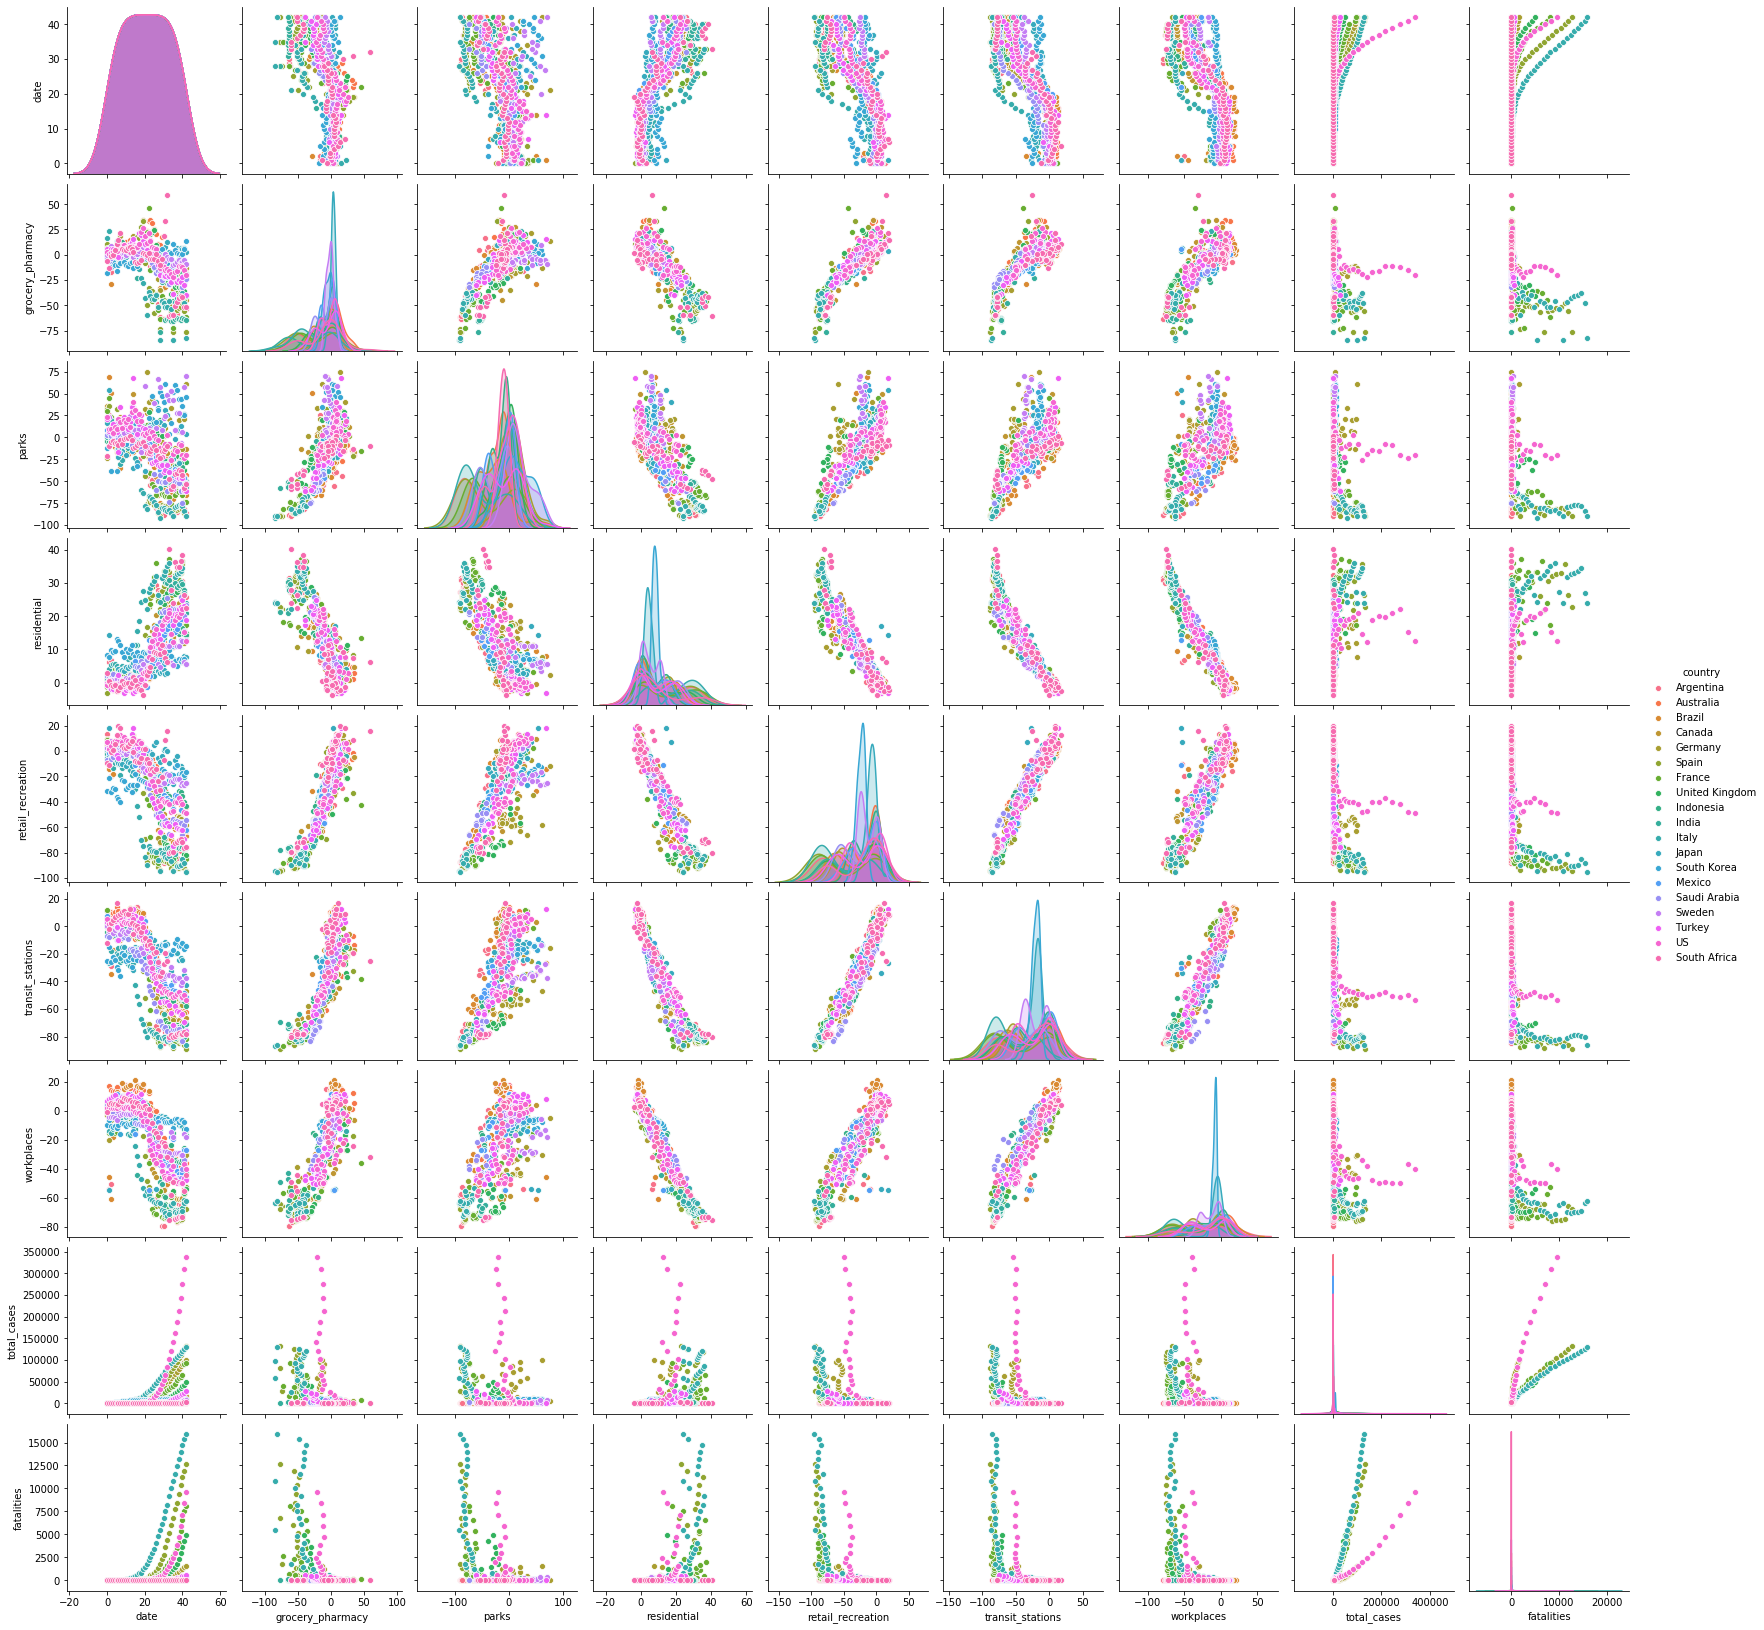

In [9]:
sb.pairplot(covid_data.dropna(),hue="country")
;

We can already see that some data correlates in a linear way, for instance, retail_recreation & transit_stations. Also, the total_cases and fatalities relates in an exponential way with the date.

At a first sight, no outliers are obvious, that can be derived from the fact that the number of samples is high. 

We can also make this kind of plot without country division:

''

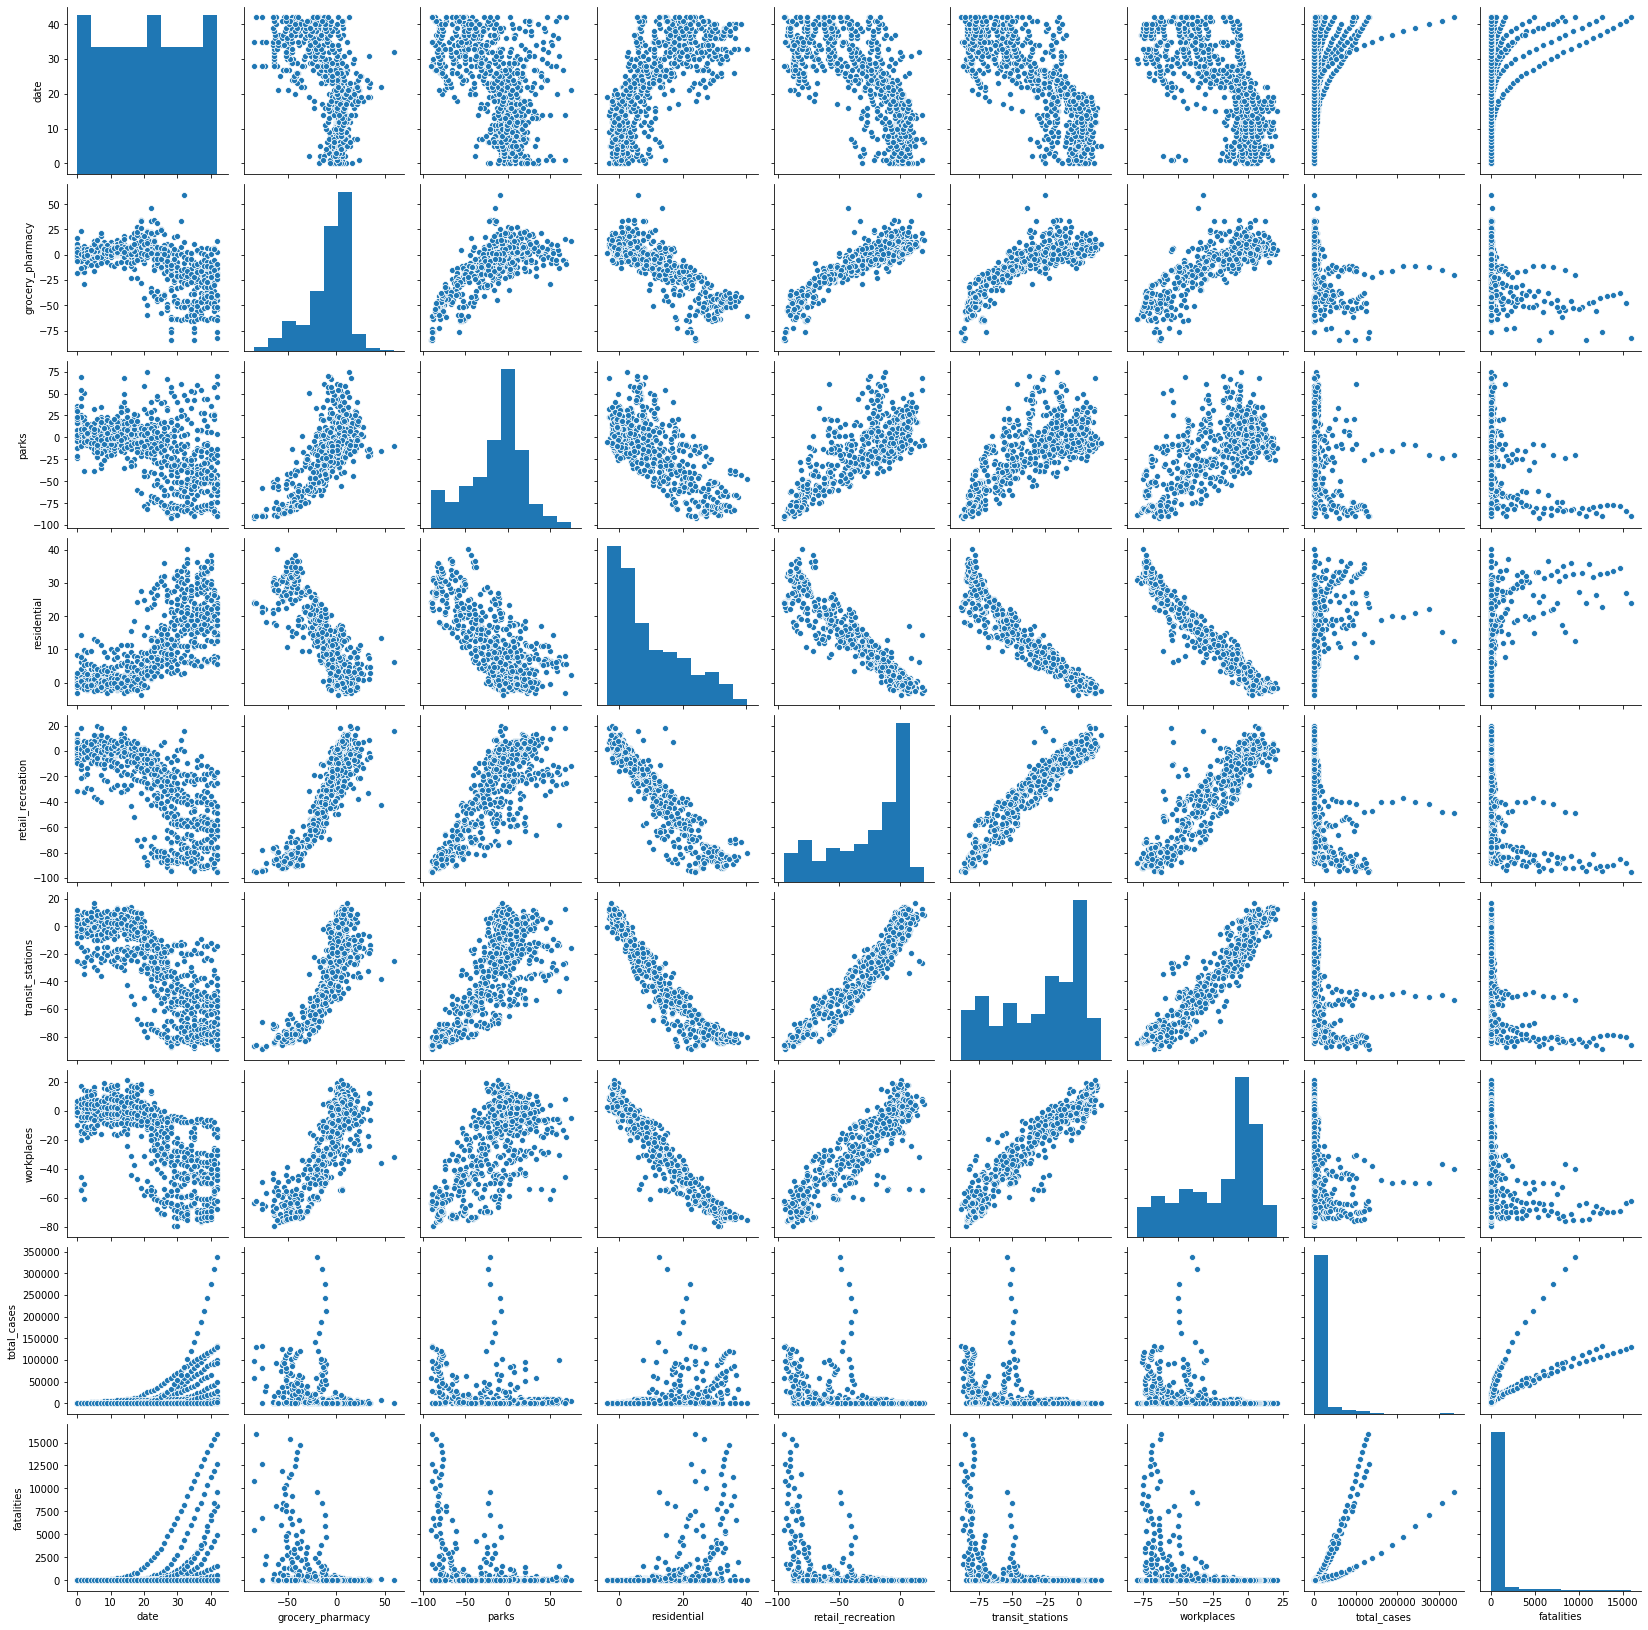

In [10]:
sb.pairplot(covid_data.dropna())
;

Notice how total_cases and fatalities relate to date in a logaritmic way. Let's transform this data and see how it behaves for one of the countries:


<ipython-input-11-74c993724dd8>:13: RuntimeWarning: divide by zero encountered in log
  axs[1,0].scatter(days_column,np.log(total_cases_column))
<ipython-input-11-74c993724dd8>:20: RuntimeWarning: divide by zero encountered in log
  axs[1,1].scatter(days_column,np.log(fatalities_column))


[Text(0, 0.5, 'log(Fatalities)'), Text(0.5, 0, 'Days')]

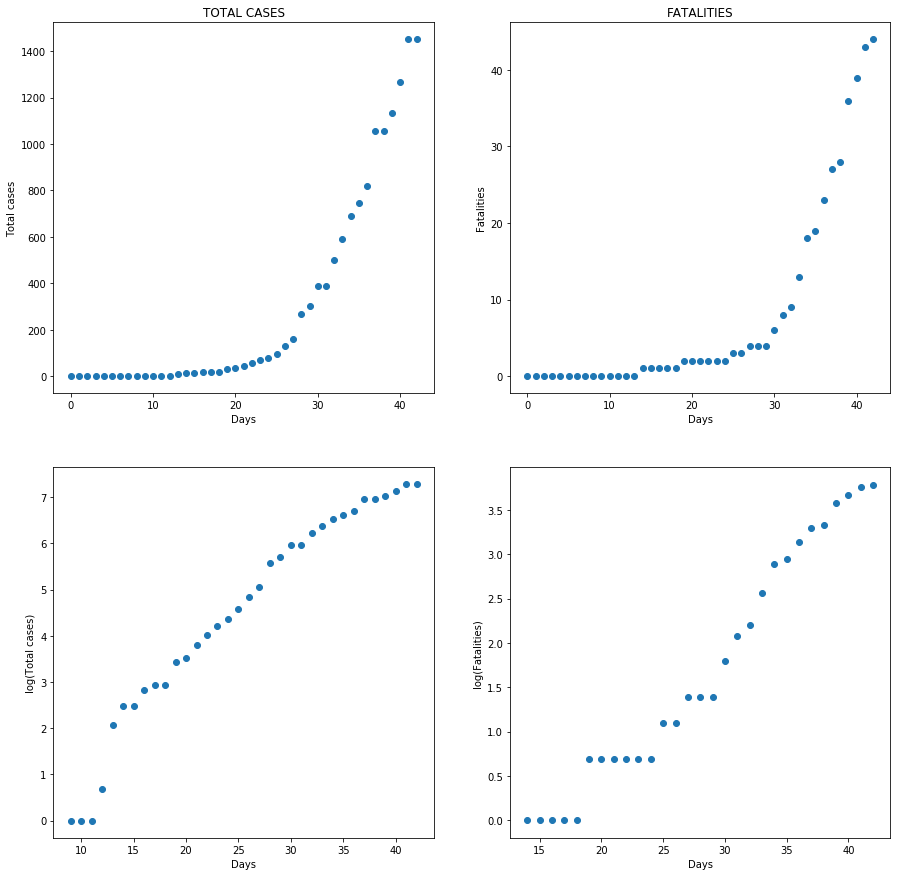

In [11]:
days_column=np.array(covid_data.loc[:,"date"])[:43]
total_cases_column=np.array(covid_data.loc[:,"total_cases"])[:43]
fatalities_column=np.array(covid_data.loc[:,"fatalities"])[:43]



import matplotlib.pyplot as plt
fig,axs=plt.subplots(2,2,figsize=(15,15))
axs[0,0].scatter(days_column,total_cases_column)
axs[0,0].set(xlabel="Days",ylabel="Total cases")
axs[0,0].set_title("TOTAL CASES")

axs[1,0].scatter(days_column,np.log(total_cases_column))
axs[1,0].set(xlabel="Days",ylabel="log(Total cases)")

axs[0,1].scatter(days_column,fatalities_column)
axs[0,1].set(xlabel="Days",ylabel="Fatalities")
axs[0,1].set_title("FATALITIES")

axs[1,1].scatter(days_column,np.log(fatalities_column))
axs[1,1].set(xlabel="Days",ylabel="log(Fatalities)")




Well it's not perfect, but we can see some behaviour in this way.

## Divide the data
It is important that we don't use the same countries for training and testing the data, since we samples of the same countries would create bias entries for testing. 

There are two obvious regression problems we can try to solve using this data: predicting the total_cases and the fatalities according to the other columns of features.


### First regression problem: predict total_cases
For this first problem, the following features will be used:

 * Date
 * Grocery_pharmacy
 * Parks
 * Residential
 * Retail_recreation 
 * Transit_stations
 * Workplaces
 
Notice that we don't use fatalities for this problem, as it would be a bias feature for this problem. For the next task, the fatalities will be predicted with and without the total number of cases, for results comparison.



For implementing a cross validation method that considers the country separation, we will be using sklearn.model_selection methods, like GroupKFold.

Also, notice that our data takes account a time series, so we added an extra feature column. We are trying to predict the total_cases in a certain day, so we added the total_cases in the previous day to features column. In order to do this, in day 0, for the countries that the total_cases were different from 0, that line was deleted from the features.

In [12]:
data=covid_data.copy()

previous_cases_column=[]
for i in range(0,len(data.date)):
  if data.date[i]==0:
    if data.total_cases[i]==0:
        previous_cases_column.append(0)
    else:
        previous_cases_column.append(-1)
  else:
    previous_cases_column.append(data.total_cases[i-1])

    
previous_cases_column=np.array(previous_cases_column)

data["previous_total_cases"]=previous_cases_column

days43=(data.previous_total_cases!=-1)
data=data[days43]
data=data.reset_index(drop=True)
print(data.shape)

all_features=data[['grocery_pharmacy','parks','residential','retail_recreation','transit_stations','workplaces','previous_total_cases']].values
all_labels=data['total_cases'].values
all_groups=np.array(data.loc[:,"country"])

print("Features shape : ",all_features.shape)
print("All labels shape : ", all_labels.shape)
print("All groups shape : ", all_groups.shape)

(806, 11)
Features shape :  (806, 7)
All labels shape :  (806,)
All groups shape :  (806,)


It is important to normalize/standardize our data, this should be done individually for each train/val/test set, so there's no bias in the values that help us do this normalization.

Let's take a look again to our data statistics:


In [13]:
data.describe()

date  grocery_pharmacy       parks  residential  \
count  806.000000        806.000000  806.000000   806.000000   
mean    21.286600         -8.385151  -13.738919     9.671969   
std     12.255094         21.393510   32.909218    10.556458   
min      0.000000        -84.798000  -91.456000    -3.647000   
25%     11.000000        -16.929250  -33.377000     0.780250   
50%     21.000000          0.052500   -6.849000     6.142000   
75%     32.000000          4.738250    6.490500    16.847750   
max     42.000000         59.474000   75.002000    40.343000   

       retail_recreation  transit_stations  workplaces    total_cases  \
count         806.000000        806.000000  806.000000     806.000000   
mean          -26.552326        -28.780753  -19.378757   10844.595533   
std            31.035204         30.190194   26.066066   31847.533829   
min           -95.158000        -88.956000  -79.293000       0.000000   
25%           -51.172500        -54.394000  -41.153500      30.000000   
50%           -15.015500        -19.723000   -8.567000     671.500000   
75%            -0.754250         -1.419500    1.025500    4813.750000   
max            19.699000         16.822000   21.347000  336912.000000   

         fatalities  previous_total_cases  
count    806.000000            806.000000  
mean     573.718362           9688.316377  
std     2021.103132          28755.936634  
min        0.000000              0.000000  
25%        0.000000             20.000000  
50%        7.000000            525.000000  
75%       83.250000           4199.250000  
max    15887.000000         308693.000000

Looking at the mean, std, min and max values, we can see that if we do not normalize this data, some features may have more importance than others. 

To prevent this, it's important to normalize the features. But first, we can analyse the data throughout a number of algorithms and metrics to see which might be the one that can better fit this data.

In order to do this, we use GroupKFold to separate the data in the first place:

In [14]:
from sklearn.model_selection import GroupKFold

#Define number of splits
n_splits=5

group_kfold=GroupKFold(n_splits=n_splits)
print("Splits", group_kfold.get_n_splits(all_features,all_labels,all_groups))
print(group_kfold)

Splits 5
GroupKFold(n_splits=5)


Example for K-Fold Split taking groups in considerations! We make 5 different splits from our data. As we can see bellow, none of the test ID's (countries) are the same in each split.

In [15]:
counter=1
for train_idx,test_idx in group_kfold.split(all_features,all_labels,all_groups):
    print("SPLIT : ", counter)
    #print("TRAIN :", train_idx, "    TEST : ", test_idx)
    print("TRAIN SPLIT: ")
    print(np.unique(np.array(data.loc[train_idx]["country"])))
    print("TEST SPLIT: ")
    print(np.unique(np.array(data.loc[test_idx]["country"])))
    print("\n")
    counter+=1

SPLIT :  1
TRAIN SPLIT: 
['Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India' 'Indonesia'
 'Italy' 'Japan' 'Saudi Arabia' 'South Africa' 'South Korea' 'Spain'
 'Turkey' 'US']
TEST SPLIT: 
['Argentina' 'Mexico' 'Sweden' 'United Kingdom']


SPLIT :  2
TRAIN SPLIT: 
['Argentina' 'Australia' 'Brazil' 'Canada' 'France' 'Germany' 'Indonesia'
 'Italy' 'Mexico' 'Saudi Arabia' 'South Africa' 'South Korea' 'Spain'
 'Sweden' 'United Kingdom']
TEST SPLIT: 
['India' 'Japan' 'Turkey' 'US']


SPLIT :  3
TRAIN SPLIT: 
['Argentina' 'Australia' 'Canada' 'France' 'Germany' 'India' 'Japan'
 'Mexico' 'Saudi Arabia' 'South Africa' 'South Korea' 'Spain' 'Sweden'
 'Turkey' 'US' 'United Kingdom']
TEST SPLIT: 
['Brazil' 'Indonesia' 'Italy']


SPLIT :  4
TRAIN SPLIT: 
['Argentina' 'Australia' 'Brazil' 'France' 'India' 'Indonesia' 'Italy'
 'Japan' 'Mexico' 'Saudi Arabia' 'Spain' 'Sweden' 'Turkey' 'US'
 'United Kingdom']
TEST SPLIT: 
['Canada' 'Germany' 'South Africa' 'South Korea']


SPLIT :  5
TRAIN SPLIT: 

After creating this sets, we can use group_kfold generator to plot learning curves for many algorithms and evaluation metrics. In the next steps, we'll be performing algorithms such as:
 * K-Nearest Neighbors
 * Linear Regression
 * Naive Bayes
 * Logistic Regression
 * Stochastic Gradient Descent
 * SVM - Support Vector Machines
 * MLP - Multi-Layer Perceptron
 * Decision Trees
 * Random Forest
 
And also metrics like:
 * Mean Squared Error (MSE)
 * Max Error
 * Mean absolute error
 * R^2 
 
After this, we'll discuss which algorithm performed the best.

The next section of code is a function (plot_learning_curve) provided bu scikit-learn will help us plot interesting curves about our models performance.

In [16]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, groups,scoring, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20,3))
    plt.subplots_adjust(top=2)
    plt.rcParams.update({'font.size': 15})

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, 
                       groups=groups,
                       cv=cv,
                       scoring=scoring, 
                       n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



Now it's time to put this into work!

In [19]:
#Import modules for models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model #linear_model.SGDRegressor()
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn import tree #tree.DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor


#Import modules for metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


It is important to notice that the hyper-parameters of the models must adjust to our data, in a first approach to choose the best type of model, these are going to be pseudo-random, enabling a fast fit of the data, because we are using 7 different models with 4 different types of metrics, which takes some minutes to train and plot the learning curves.

In [20]:
#Define models, titles and metrics
models=[LinearRegression(),
       KNeighborsRegressor(n_neighbors=3),
       GaussianNB(),
       #LogisticRegression(max_iter=100),
       linear_model.SGDRegressor(max_iter=1000),
       SVC(max_iter=1000),
       MLPRegressor(),
       tree.DecisionTreeRegressor(max_depth=10),
       RandomForestRegressor(n_estimators=10,max_depth=10)]

titles=["Learning Curves (Linear Reg)",
        "Learning Curves (KNN)",
        "Learning Curves (Naive Bayes)",
        #"Learning Curves (Logistic Reg)",
        "Learning Curves (SGD)",
        "Learning Curves (SVC)",
        "Learning Curves (MLP)",
        "Learning Curves (Decision Tree)",
        "Learning Curves (Random Forest)"]
        
metrics=['neg_mean_squared_error',
         'max_error',
         'neg_mean_absolute_error',
         'r2']

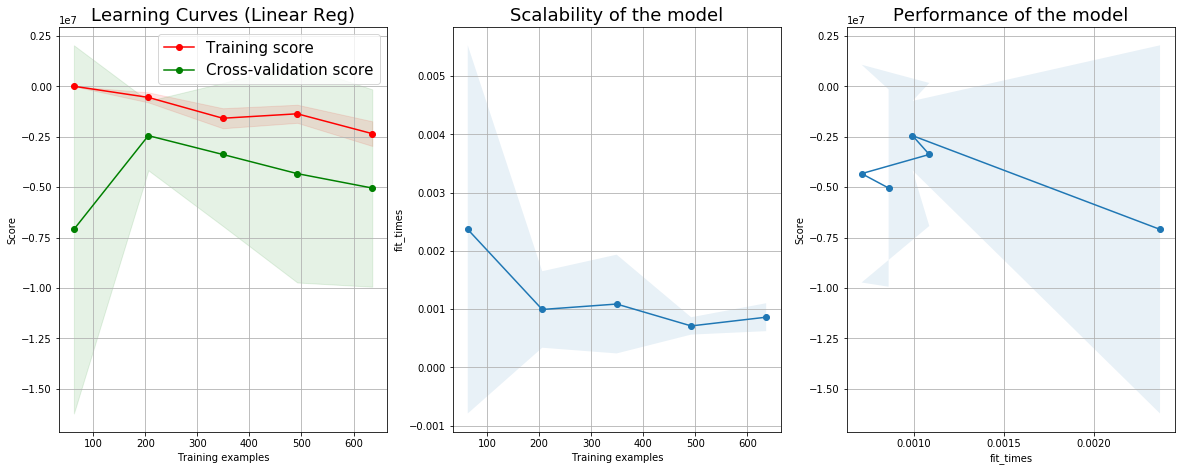

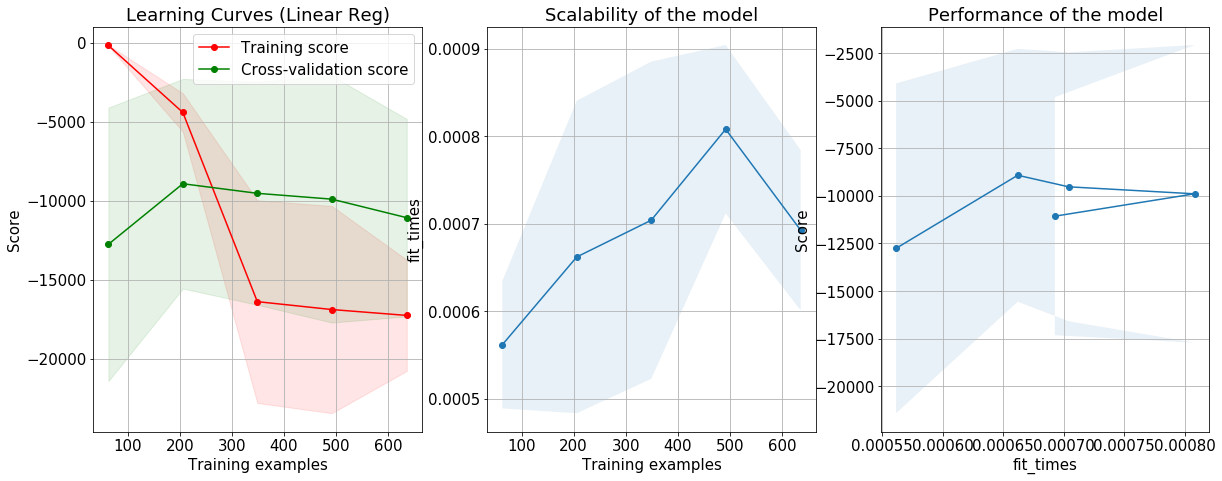

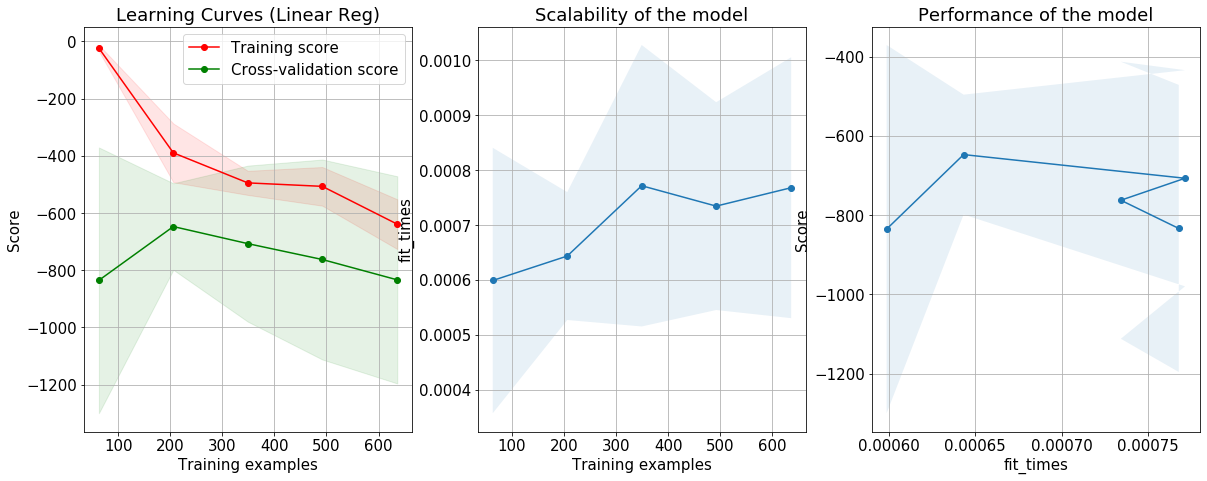

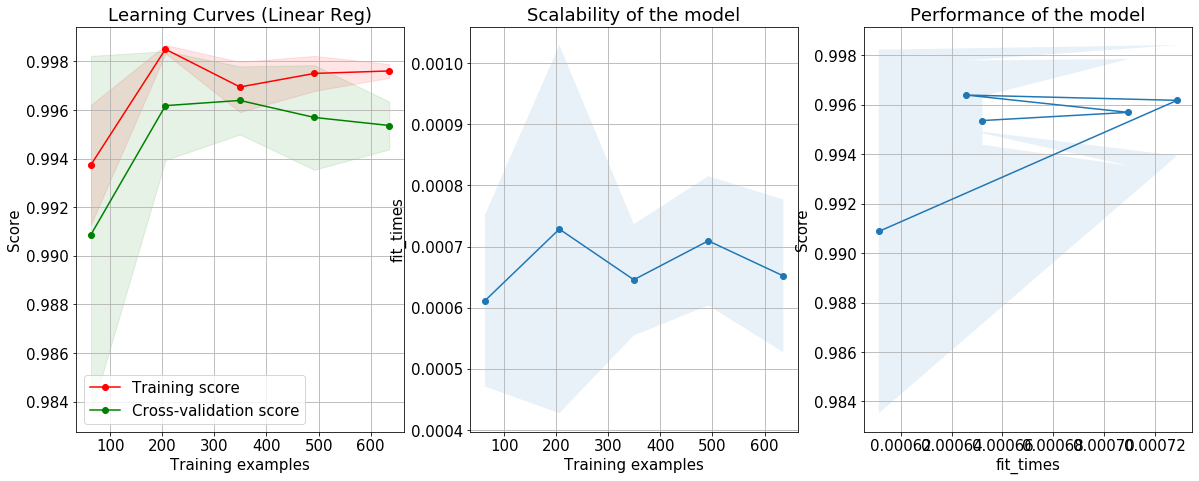

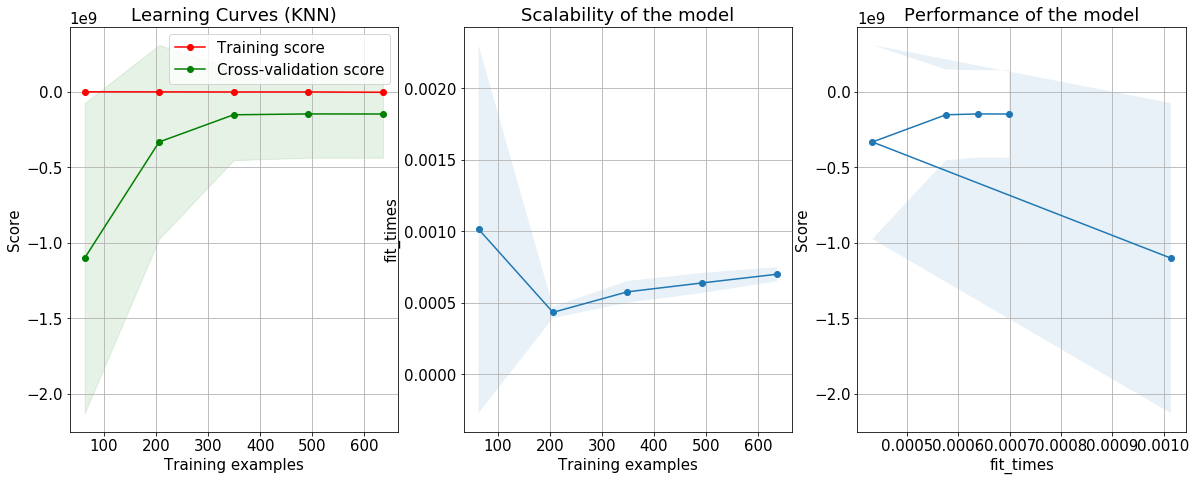

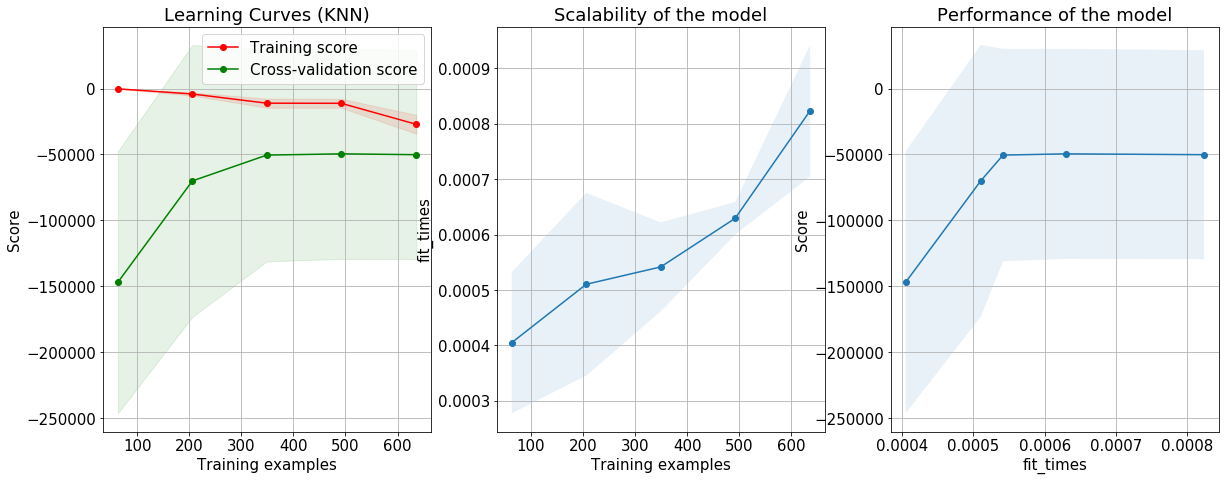

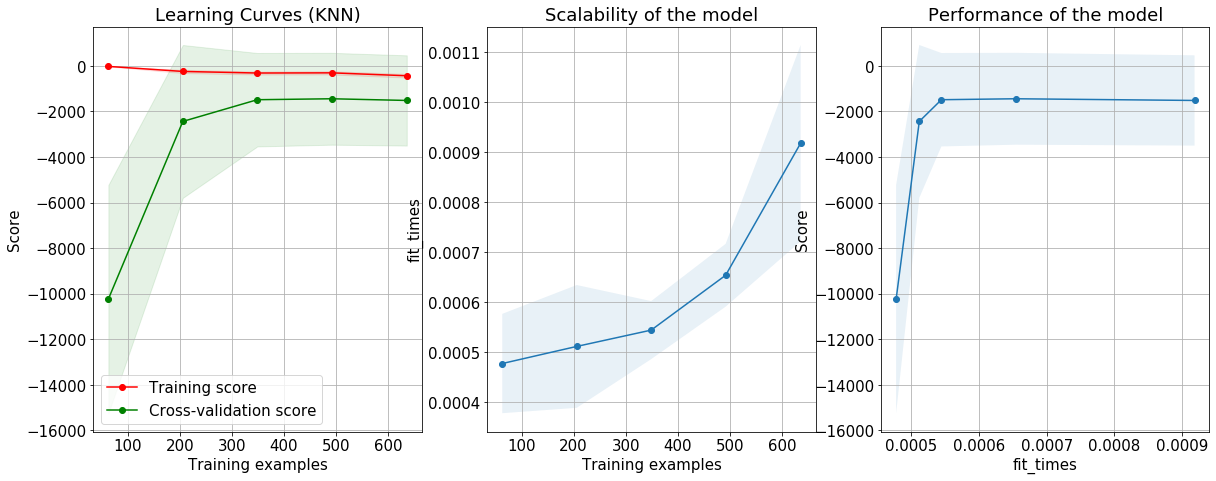

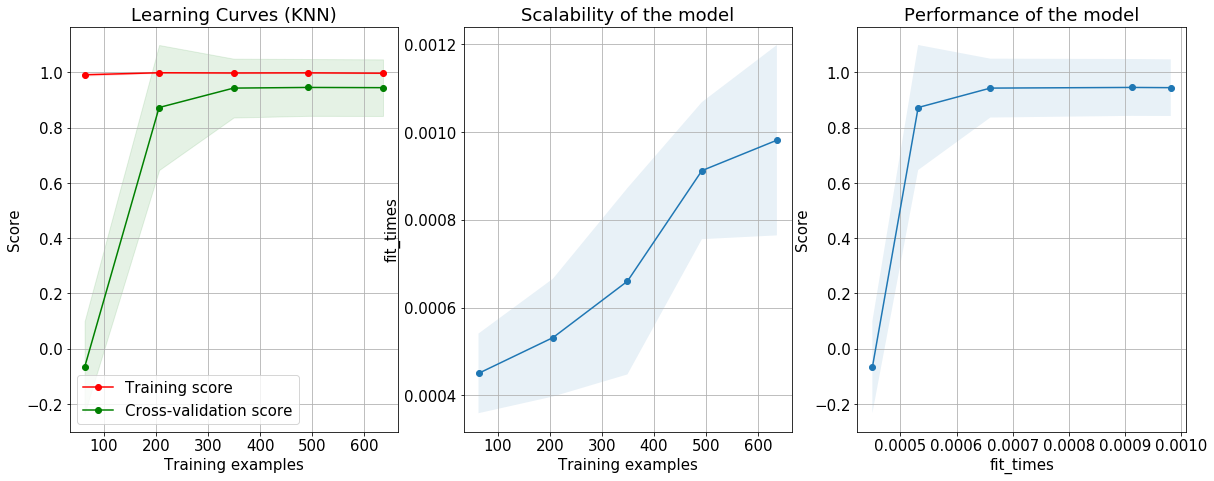

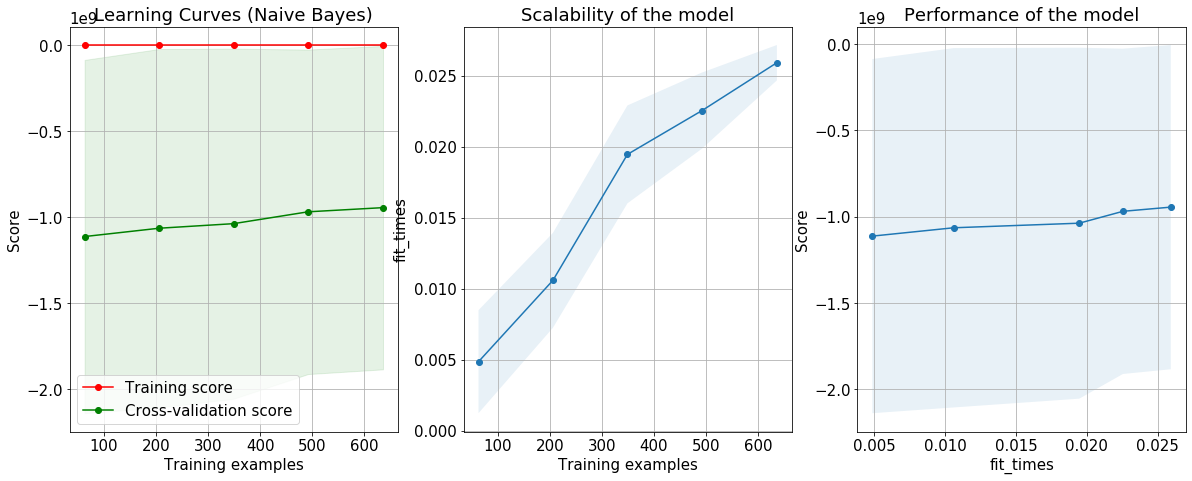

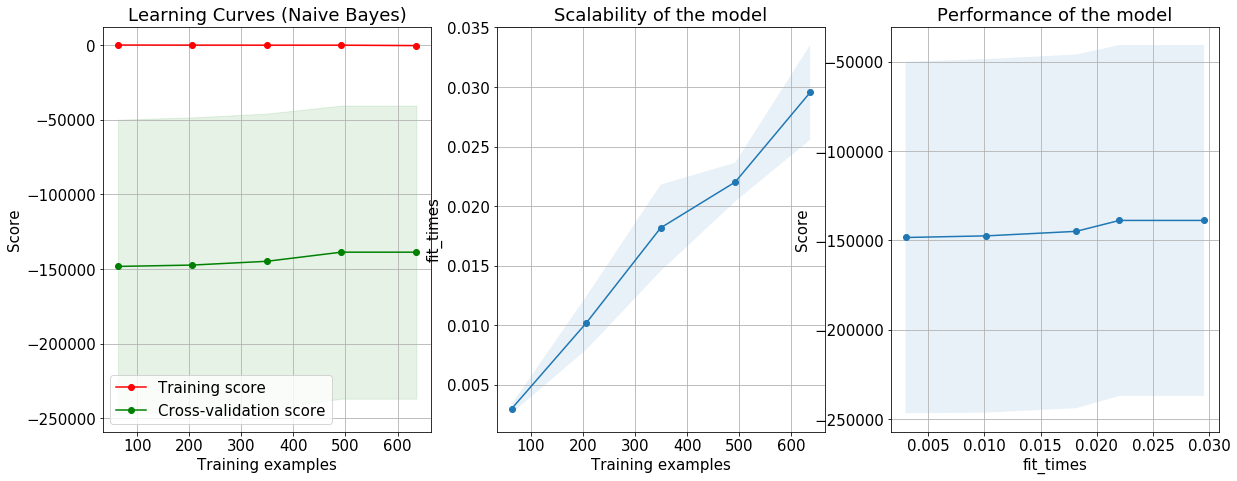

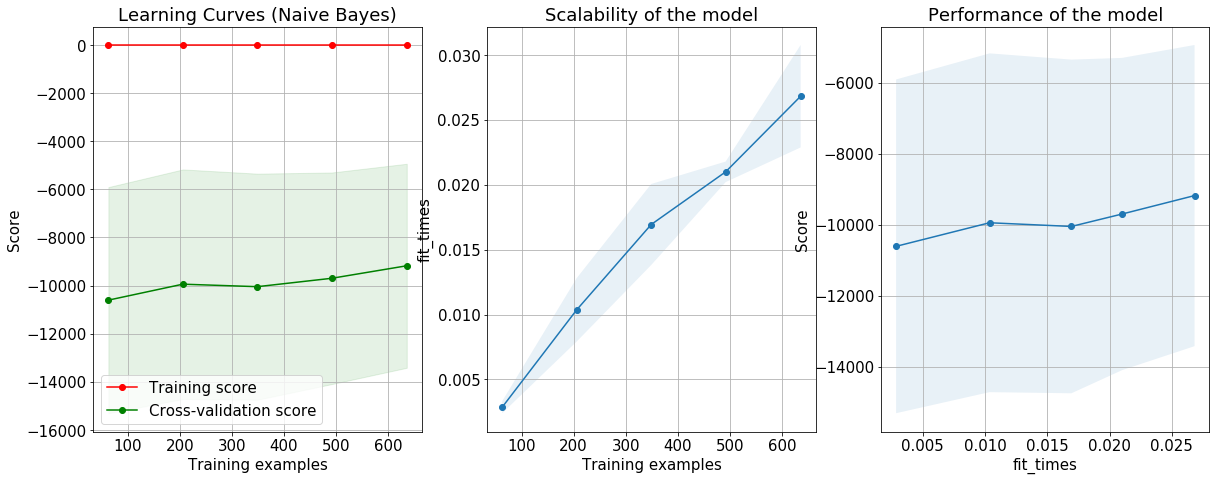

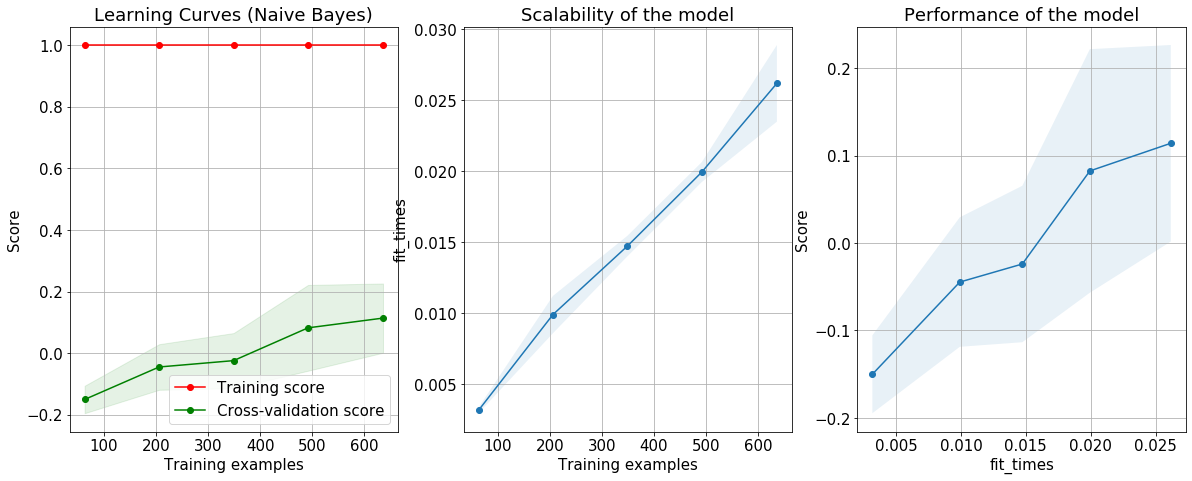

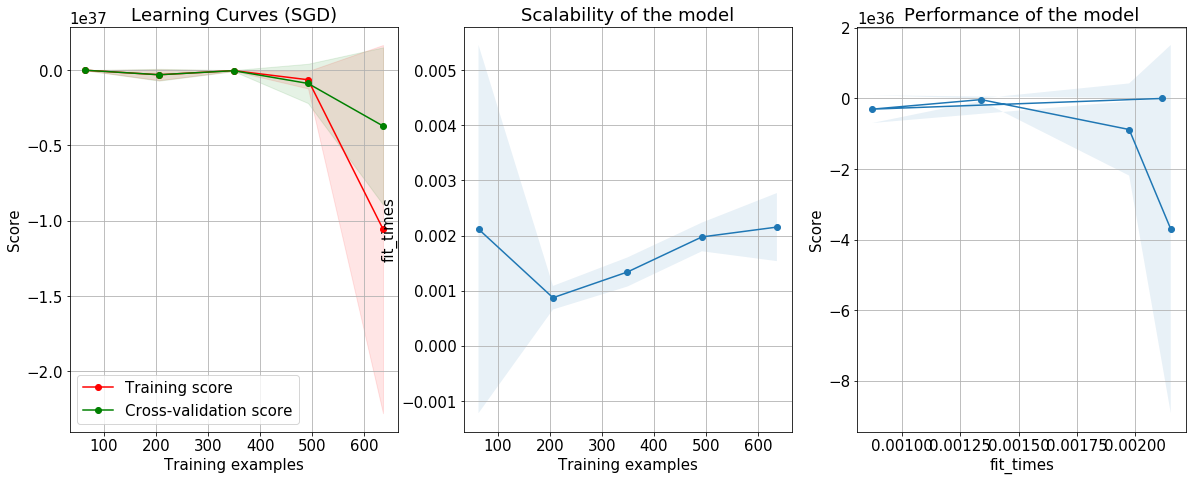

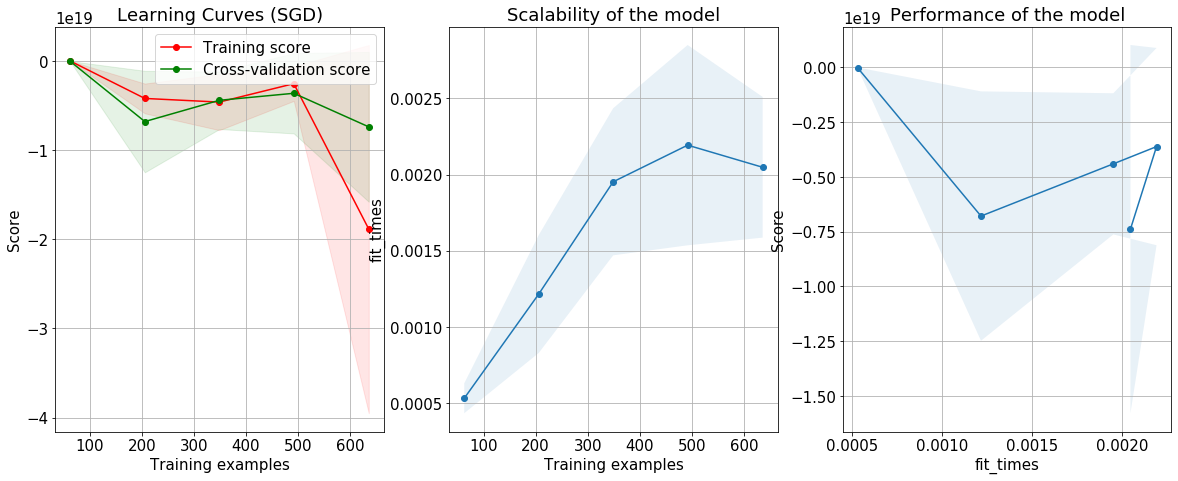

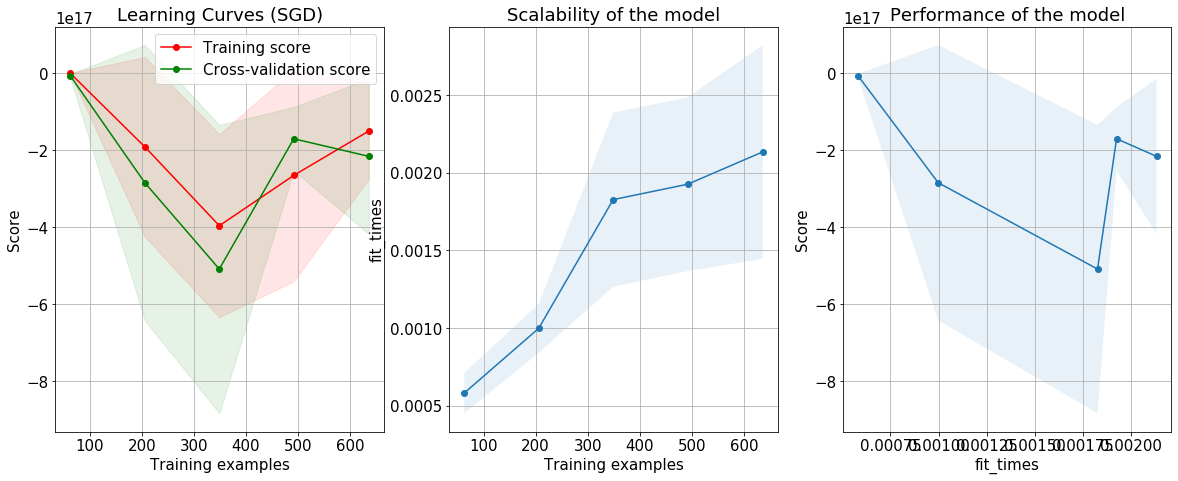

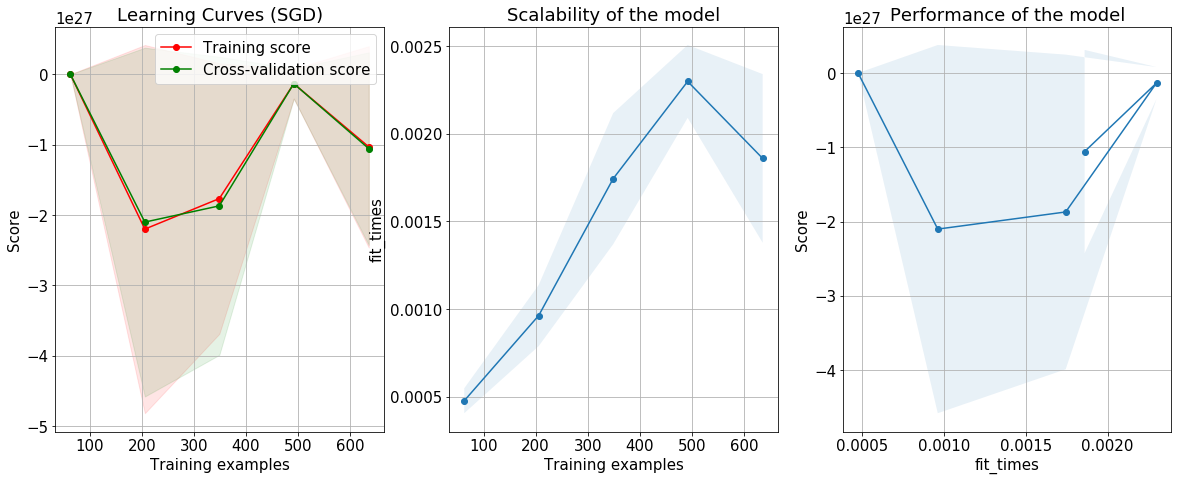

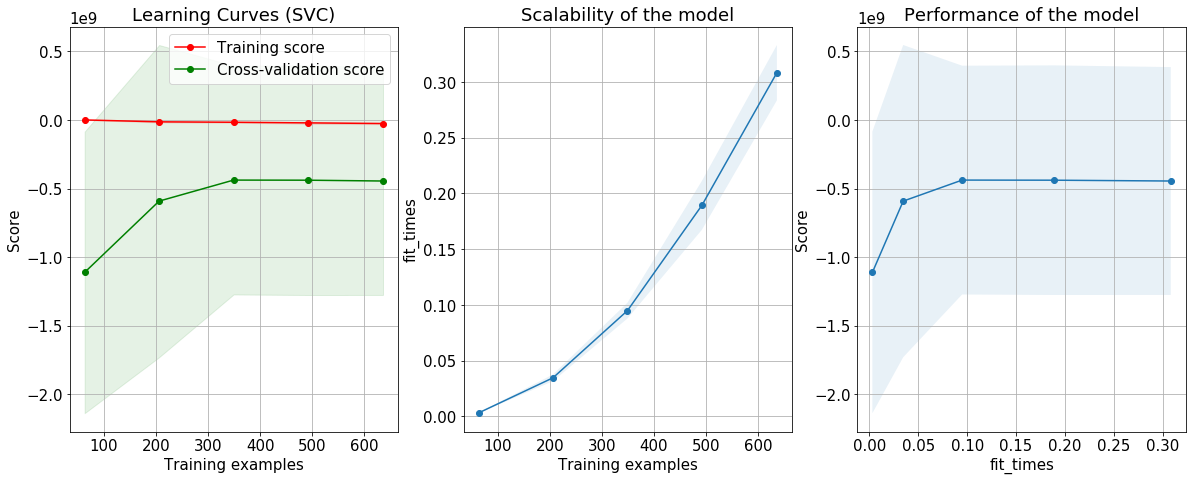

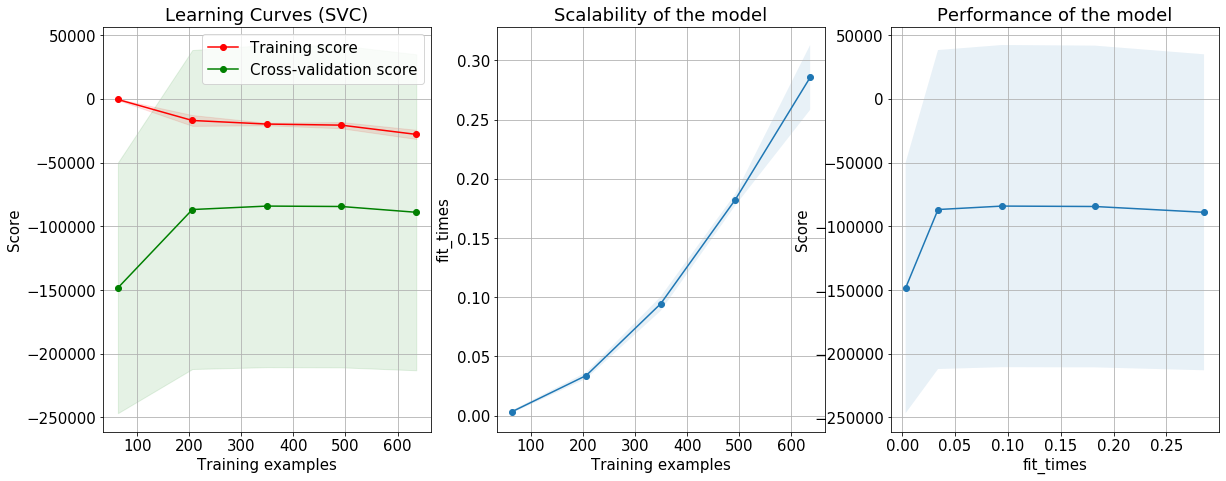

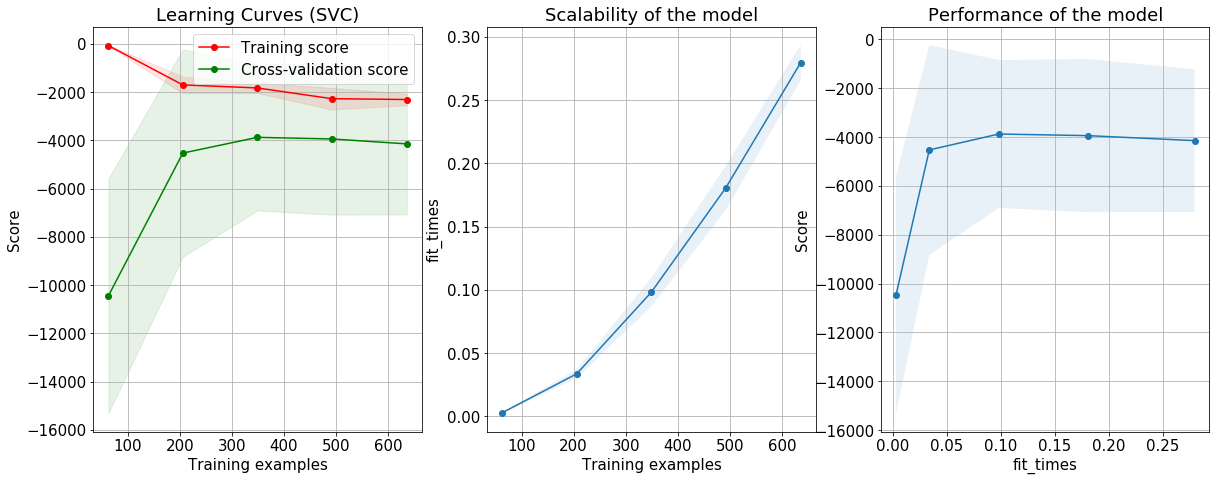

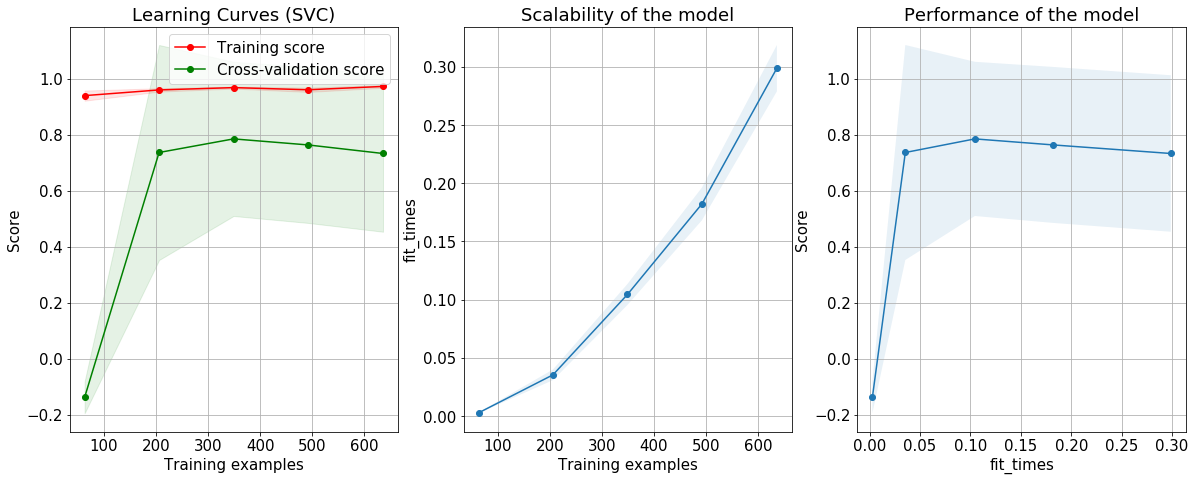

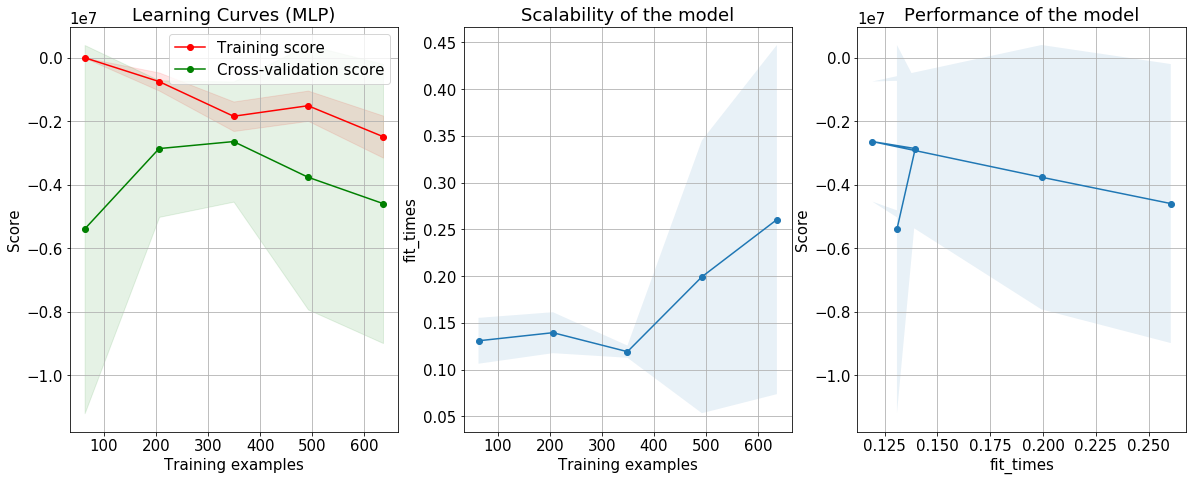

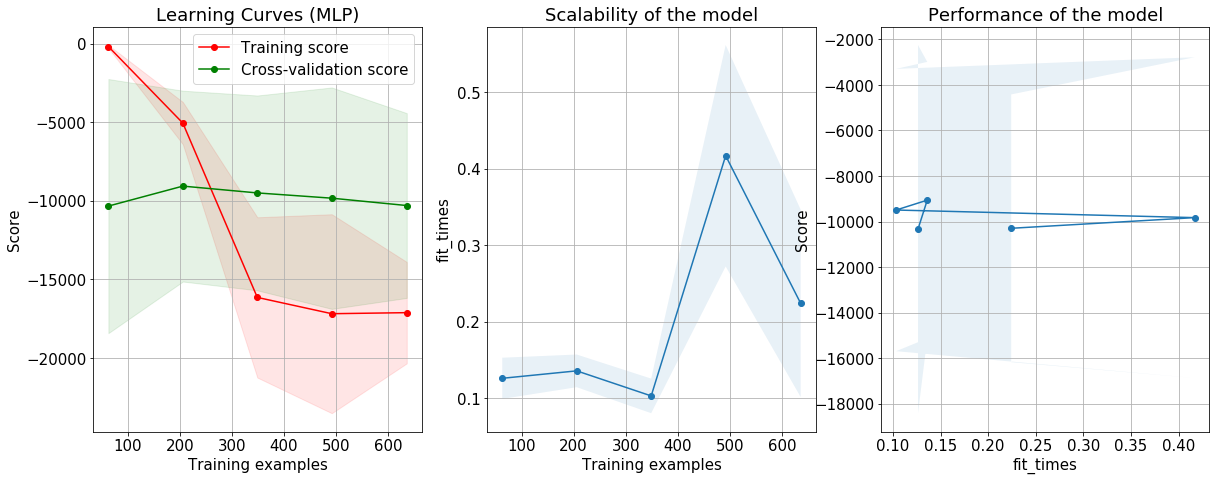

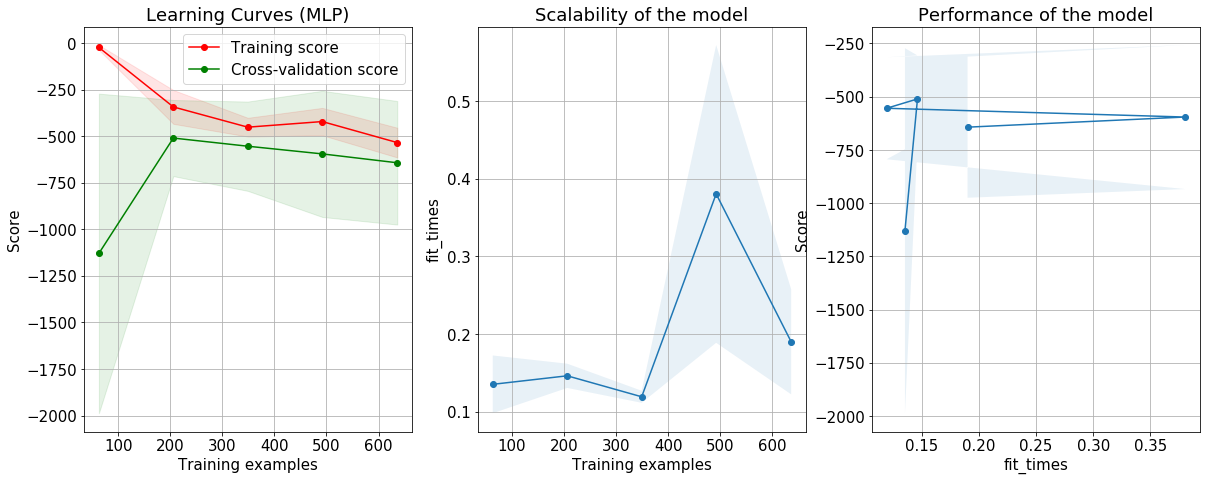

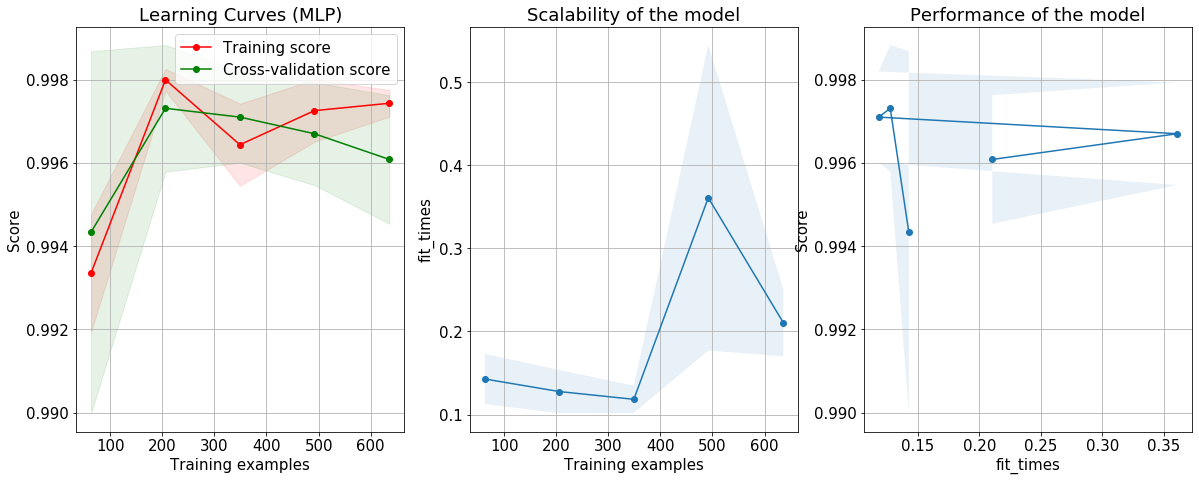

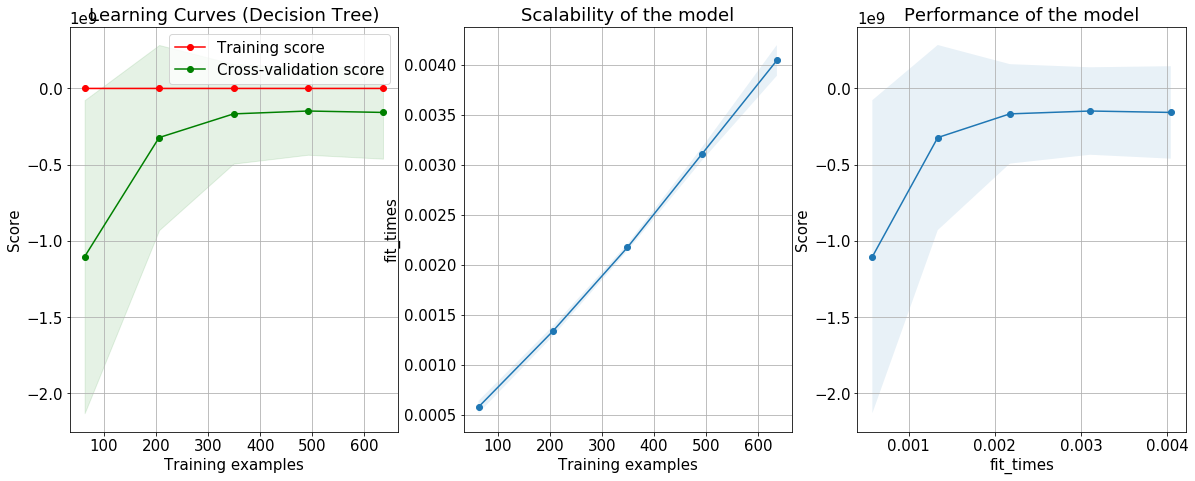

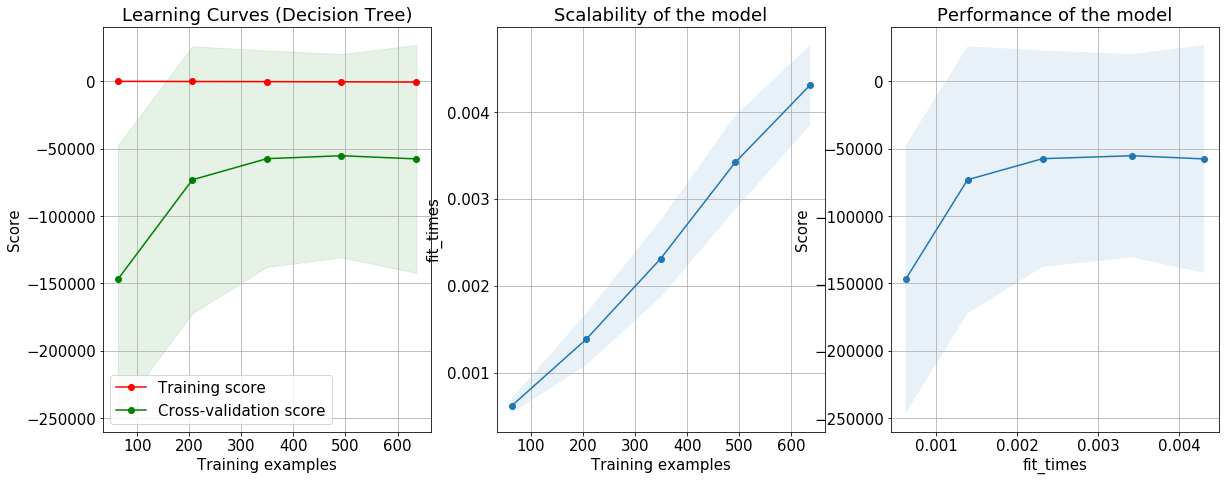

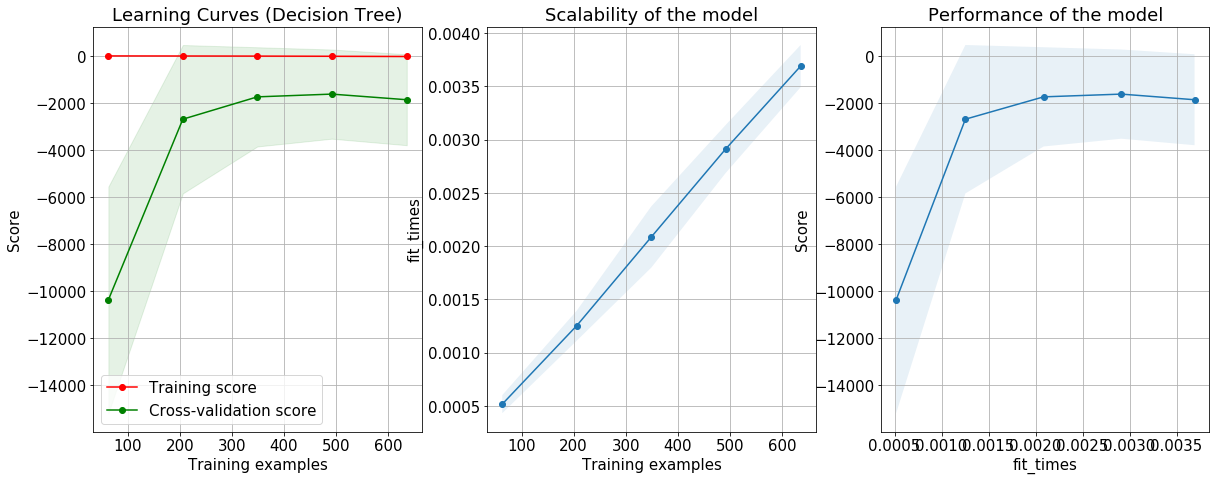

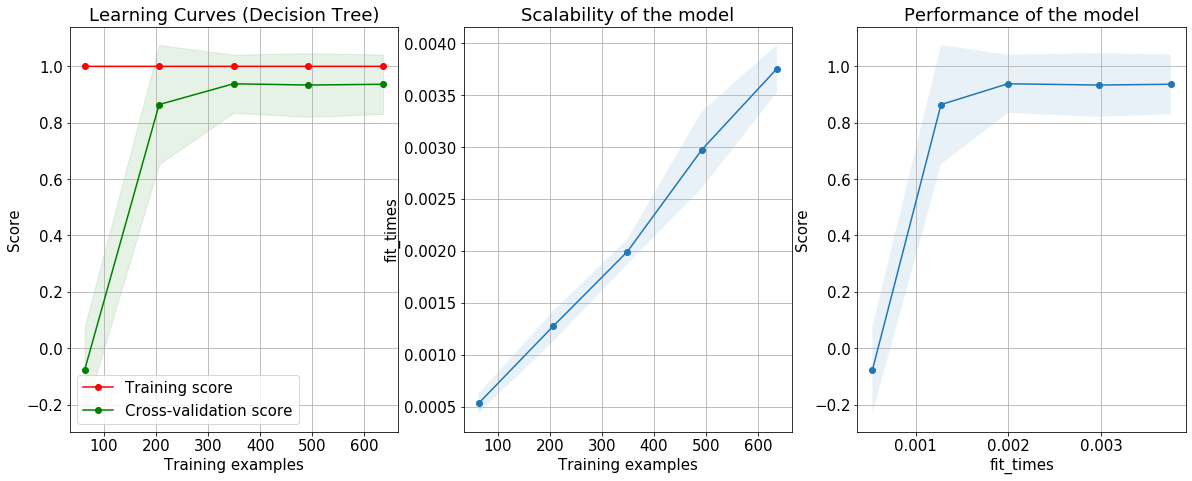

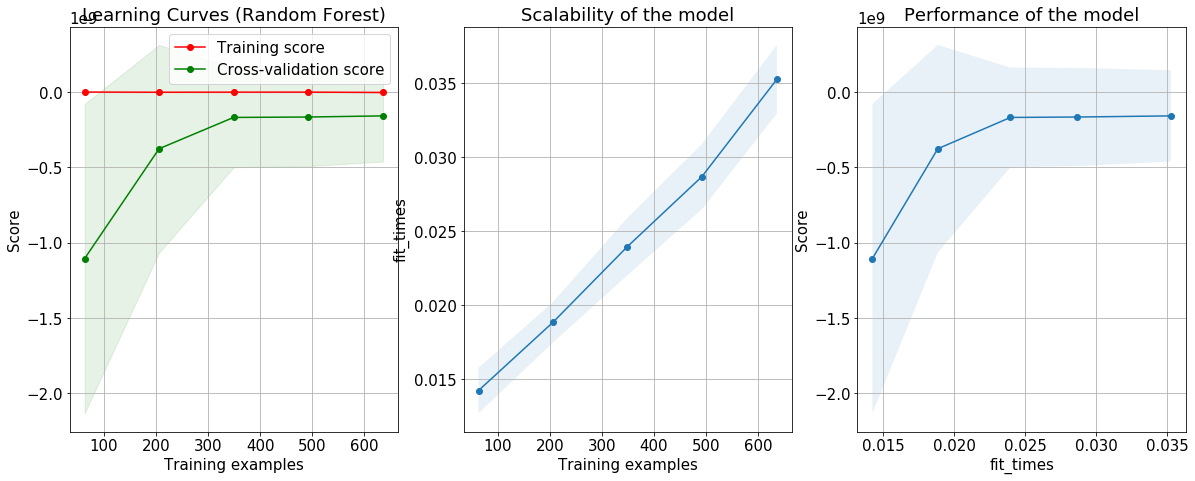

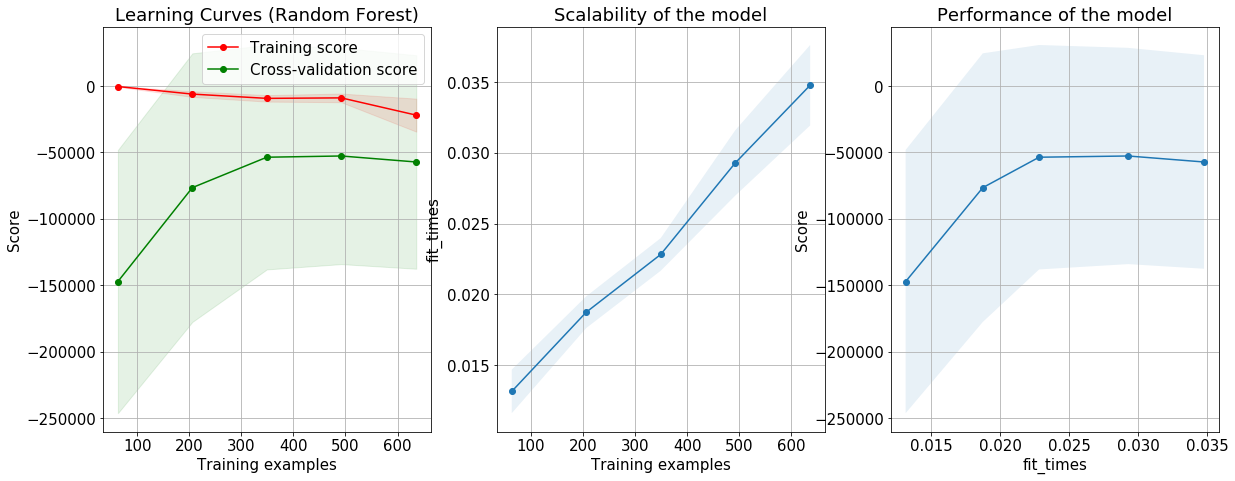

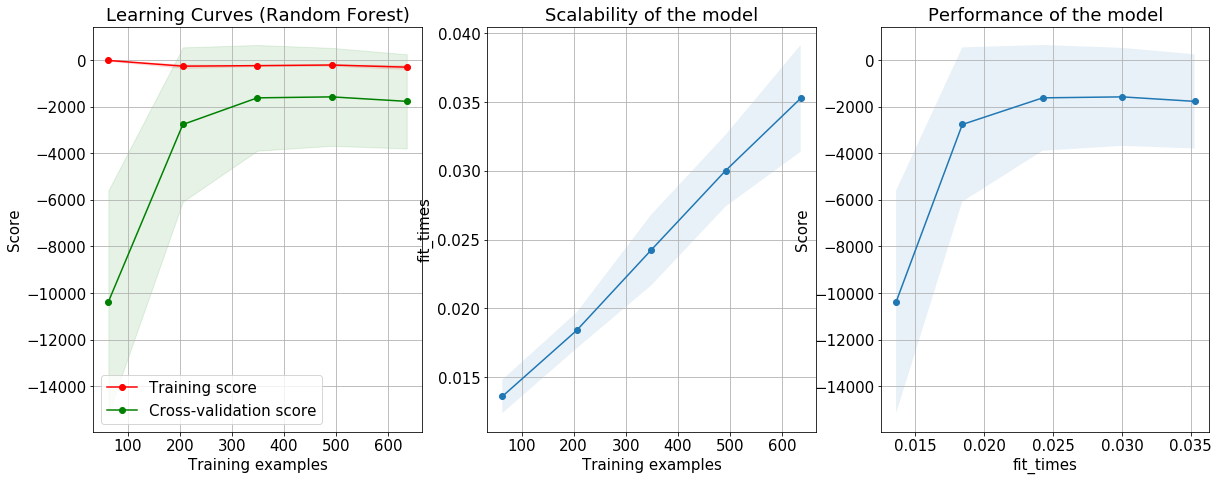

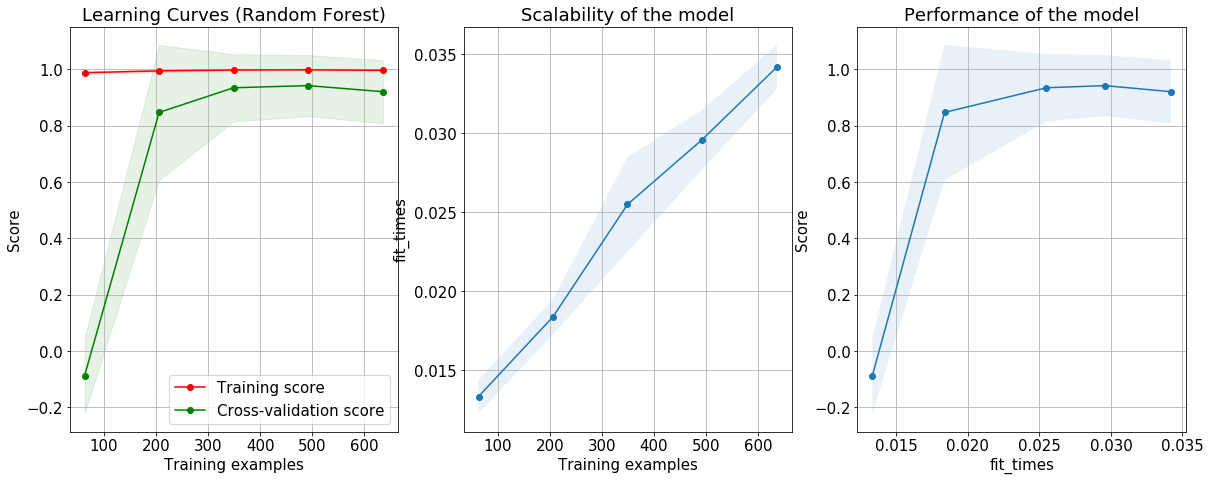

In [21]:
import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(models)):
    for metric in metrics:
        plot_learning_curve(estimator=models[i],
                    title=titles[i],
                    X=all_features,
                    y=all_labels,
                    groups=all_groups,
                    cv=group_kfold,
                    scoring=metric)

Observing the charts, we conclude that the R^2 score is the best one for preventing overfitting, having a lot of similar results in train and validation. The models that performed the best were Linear Regression, KNN, MLP, Decision Tree and Random Forests. Random Forest was the one where scalability of the model and performance of the model increased the highest, so we will be using this one to train our final model:

For standardize the data, we'll use sklearn StandardScaler from preprocessing.

The standard score of a sample x is calculated as:

<center> z = (x - u) / s

where u is the mean of the training samples, and s is the standard deviation of the training samples.
    
We are going to fit a set of different machine learning algorithms for regression provided by Scikit-Learn. Each algorithm will be trained and tested for each fold, showing and saving each fold results for further comparison.

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

train_r2scores=[]
test_r2scores=[]
train_mse_scores=[]
test_mse_scores=[]
train_maxerror_scores=[]
test_maxerror_scores=[]
train_mae_scores=[]
test_mae_scores=[]

train_r2scores_scaled=[]
test_r2scores_scaled=[]
test_mae_scores_scaled=[]
train_mse_scores_scaled=[]
test_mse_scores_scaled=[]
train_maxerror_scores_scaled=[]
test_maxerror_scores_scaled=[]
train_mae_scores_scaled=[]



for train_idx,test_idx in group_kfold.split(all_features,all_labels,all_groups):
    #Train set
    train_countries=np.unique(np.array(covid_data.loc[train_idx]["country"]))
    X_train=all_features[train_idx]
    y_train=all_labels[train_idx]
    
    #Test & Validation set
    test_countries=np.unique(np.array(covid_data.loc[test_idx]["country"]))
    X_test=all_features[test_idx]
    y_test=all_labels[test_idx]

    #Scaling the data
    scaler=StandardScaler()    
    X_train[:,1:7]=scaler.fit_transform(X_train[:,1:7])
    X_test[:,1:7]=scaler.transform(X_test[:,1:7])
    
    model=RandomForestRegressor()
    #model=RandomForestRegressor(n_estimators=20,max_depth=30,criterion="mae")
    model.fit(X_train,y_train)
    
    predictions_train=model.predict(X_train)
    predictions_test=model.predict(X_test)
    
    #Scale the predicted and label values to [0,1] range
    scaler_l=MinMaxScaler()
    #y
    y_train_scaled=y_train.reshape(-1,1)
    y_train_scaled=scaler_l.fit_transform(y_train_scaled)
    y_train_scaled=y_train_scaled.reshape(-1)
    
    y_test_scaled=y_test.reshape(-1,1)
    y_test_scaled=scaler_l.fit_transform(y_test_scaled)
    y_test_scaled=y_test_scaled.reshape(-1)
    #pred
    predictions_train_scaled=predictions_train.reshape(-1,1)
    predictions_train_scaled=scaler_l.fit_transform(predictions_train_scaled)
    predictions_train_scaled=predictions_train_scaled.reshape(-1)       
    
    predictions_test_scaled=predictions_test.reshape(-1,1)
    predictions_test_scaled=scaler_l.fit_transform(predictions_test_scaled)
    predictions_test_scaled=predictions_test_scaled.reshape(-1)
      
        
    #Calculate values of metrics
    #Non-scaled
    r2_train=r2_score(y_train,predictions_train)
    r2_test=r2_score(y_test,predictions_test)
    
    mse_train=mse(y_train,predictions_train)
    mse_test=mse(y_test,predictions_test)
    
    me_train=max_error(y_train,predictions_train)
    me_test=max_error(y_test,predictions_test)
    
    mae_train=mean_absolute_error(y_train,predictions_train)
    mae_test=mean_absolute_error(y_test,predictions_test)    
    
    #Scaled
    r2_train_scaled=r2_score(y_train_scaled,predictions_train_scaled)
    r2_test_scaled=r2_score(y_test_scaled,predictions_test_scaled)
    
    mse_train_scaled=mse(y_train_scaled,predictions_train_scaled)
    mse_test_scaled=mse(y_test_scaled,predictions_test_scaled)
    
    me_train_scaled=max_error(y_train_scaled,predictions_train_scaled)
    me_test_scaled=max_error(y_test_scaled,predictions_test_scaled)
    
    mae_train_scaled=mean_absolute_error(y_train_scaled,predictions_train_scaled)
    mae_test_scaled=mean_absolute_error(y_test_scaled,predictions_test_scaled)  
    
    
    #Save results
    #Non-scaled
    train_r2scores.append(round(r2_train,4))
    test_r2scores.append(round(r2_test,4))
    
    train_mse_scores.append(round(mse_train,4))
    test_mse_scores.append(round(mse_test,4))
    
    train_maxerror_scores.append(round(me_train,4))
    test_maxerror_scores.append(round(me_test,4))
    
    train_mae_scores.append(round(mae_train,4))
    test_mae_scores.append(round(mae_test,4))
    
    #Scaled
    train_r2scores_scaled.append(round(r2_train_scaled,4))
    test_r2scores_scaled.append(round(r2_test_scaled,4))
    
    train_mse_scores_scaled.append(round(mse_train_scaled,4))
    test_mse_scores_scaled.append(round(mse_test_scaled,4))
    
    train_maxerror_scores_scaled.append(round(me_train_scaled,4))
    test_maxerror_scores_scaled.append(round(me_test_scaled,4))
    
    train_mae_scores_scaled.append(round(mae_train_scaled,4))
    test_mae_scores_scaled.append(round(mae_test_scaled,4))
    

    
    
results_train=pd.DataFrame(list(zip(train_r2scores,train_r2scores_scaled,train_mse_scores,train_mse_scores_scaled,train_maxerror_scores,train_maxerror_scores_scaled,train_mae_scores,train_mae_scores_scaled)),
                          columns=["R2","R2_s","MSE","MSE_s","ME","ME_s","MAE","MAE_s"])

results_test=pd.DataFrame(list(zip(test_r2scores,test_r2scores_scaled,test_mse_scores,test_mse_scores_scaled,test_maxerror_scores,test_maxerror_scores_scaled,test_mae_scores,test_mae_scores_scaled)),
                          columns=["R2","R2_s","MSE","MSE_s","ME","ME_s","MAE","MAE_s"])

Let's print the results!

In [46]:
print("Results Train")
results_train


Results Train


R2    R2_s           MSE   MSE_s        ME    ME_s       MAE   MAE_s
0  0.9978  0.9917  2.796973e+06  0.0001  31674.59  0.0738  328.3906  0.0036
1  0.9996  0.9991  2.307081e+05  0.0000   7244.09  0.0488  145.9126  0.0019
2  0.9977  0.9928  2.282605e+06  0.0001  29501.95  0.0853  277.5231  0.0026
3  0.9969  0.9911  3.721937e+06  0.0001  33233.45  0.0795  325.4431  0.0033
4  0.9973  0.9932  2.932541e+06  0.0001  30943.52  0.0797  300.9685  0.0027

In [47]:
print("\n")
print("Results Test")
results_test



Results Test


R2    R2_s           MSE   MSE_s         ME    ME_s        MAE   MAE_s
0  0.9980  0.9983  1.105359e+05  0.0000    2253.08  0.0444   149.9859  0.0025
1  0.7201  0.5388  7.813955e+08  0.0113  213986.57  0.5788  5715.3349  0.0364
2  0.9959  0.9976  4.040731e+06  0.0001   15563.05  0.1023   674.7866  0.0042
3  0.9831  0.9942  5.823827e+06  0.0002   14911.15  0.0622  1089.0180  0.0076
4  0.9966  0.9963  2.560301e+06  0.0002   14943.74  0.0938   612.3913  0.0053

Even with the results scaled, the values of the Mean Squared Error are really high. Therefore, to guarantee the accuracy of the results, the results will be evaluated by country (since the difference of the dimensionality of the labels by country)

In [33]:
train_mse_scores_scaled=[]
test_mse_scores_scaled=[]
for i in range(len(np.unique(np.array(data.loc[train_idx]["country"])))):
    
    #Scale the predicted and label valus to [0,1] range
    scaler_l=MinMaxScaler()
    #y
    y_train_scaled=y_train[(0+42*i):(42+42*i)].reshape(-1,1)
    y_train_scaled=scaler_l.fit_transform(y_train_scaled)
    y_train_scaled=y_train_scaled.reshape(-1)
    
    
    #pred
    predictions_train_scaled=predictions_train[(0+42*i):(42+42*i)].reshape(-1,1)
    predictions_train_scaled=scaler_l.fit_transform(predictions_train_scaled)
    predictions_train_scaled=predictions_train_scaled.reshape(-1)       
    
    mse_train_scaled=mse(y_train_scaled,predictions_train_scaled)
    
    train_mse_scores_scaled.append(round(mse_train_scaled,4))


for i in range(len(np.unique(np.array(data.loc[test_idx]["country"])))):
    
    #Scale the predicted and label valus to [0,1] range
    scaler_l=MinMaxScaler()
    #y
    y_test_scaled=y_test[(0+42*i):(42+42*i)].reshape(-1,1)
    y_test_scaled=scaler_l.fit_transform(y_test_scaled)
    y_test_scaled=y_test_scaled.reshape(-1)
    
    #pred
    predictions_test_scaled=predictions_test[(0+42*i):(42+42*i)].reshape(-1,1)
    predictions_test_scaled=scaler_l.fit_transform(predictions_test_scaled)
    predictions_test_scaled=predictions_test_scaled.reshape(-1)
    
    mse_test_scaled=mse(y_test_scaled,predictions_test_scaled)
    
    test_mse_scores_scaled.append(round(mse_test_scaled,4))

In [34]:
print(test_mse_scores_scaled)

[0.0008, 0.0003, 0.0008, 0.0008]


In [35]:
print(train_mse_scores_scaled)

[0.0002, 0.0, 0.0001, 0.0001, 0.0, 0.0, 0.0007, 0.0001, 0.0, 0.0002, 0.0001, 0.0001, 0.0001, 0.0, 0.0002]


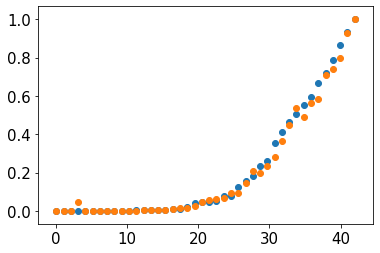

In [36]:
x=np.linspace(0,42,42)
plt.scatter(x,y_test_scaled[0:42])
plt.scatter(x,predictions_test_scaled[0:42])

In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [39]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [41]:
best_random = rf_random.best_estimator_
predictions_test=best_random.predict(X_test)

In [42]:
test_mse_scores_scaled_2=[]
for i in range(len(np.unique(np.array(data.loc[test_idx]["country"])))):
    
    #Scale the predicted and label valus to [0,1] range
    scaler_l=MinMaxScaler()
    #y
    y_test_scaled_2=y_test[(0+42*i):(42+42*i)].reshape(-1,1)
    y_test_scaled_2=scaler_l.fit_transform(y_test_scaled_2)
    y_test_scaled_2=y_test_scaled_2.reshape(-1)
    
    #pred
    predictions_test_scaled_2=predictions_test[(0+42*i):(42+42*i)].reshape(-1,1)
    predictions_test_scaled_2=scaler_l.fit_transform(predictions_test_scaled_2)
    predictions_test_scaled_2=predictions_test_scaled_2.reshape(-1)
    
    mse_test_scaled_2=mse(y_test_scaled,predictions_test_scaled)
    
    test_mse_scores_scaled_2.append(round(mse_test_scaled,4))

In [43]:
print(test_mse_scores_scaled)

[0.0008, 0.0003, 0.0008, 0.0008]


In [44]:
print(test_mse_scores_scaled_2)

[0.0008, 0.0008, 0.0008, 0.0008]
